<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2024/2025</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Lab 5 - Linear Models</center></b></h2>
    <h4><i><b><center>Linear, Polynomial and Logistic Regression</center></b></i></h4></td></tr>
</table>

## 1. Linear Models

Linear models are one of the most simple ML techniques, used both for regression and classification. Depending on the use case, they can be trained without much effort.

These models perform statistical computations to find the line that best fits the training data, to make future predictions.


## 2. Linear Regression

Linear regression is a regression model which fits the line function that minimizes the residuals, i. e. the difference between the prediction and the real values.

<img src=https://blog.dataiku.com/hs-fs/hubfs/Willy%20Wonkas%20Candy.png width="500">

Ref: https://blog.dataiku.com/top-machine-learning-algorithms-how-they-work-in-plain-english-1

A __Simple Linear Regression__ is a model that only uses one variable to estimate the values of the target. In this example, the Age is used as feature to estimate the money spent per week in the pharmacy. 

The regression line assumes the known shape:

$$y = m*x + b$$
$$\text{\$ spent per week} = m * Age + b$$

On the other hand, a __Multiple Linear Regression__ is the model that fits a line in a multi-dimensional space, i.e. leveraging multiple variables.

$$\text{\$ spent per week} = m_1 * Age + m_2 * Income + m_3 * Comorbidities + b$$

$m_1$, $m_2$, $m_3$ and $b$ are the model parameters that weight (m) each feature and add the bias (b).

### 2.1. The Medical Cost Prediction Dataset

Let's have a look at an exemplarly dataes that is commonly used to introduce regression tasks: __The Medical Cost Prediction Dataset__. This dataset is used to predict individual healthcare expenses based on various demographic and health-related factors. This dataset is commonly employed in machine learning and statistical modeling to analyze how different factors influence medical costs, helping to build predictive models for healthcare pricing, insurance premiums, and personalized cost estimates. 

The dataset contains the following feautres (X):

* __age__: The age of the individual (in years).
* __sex__: Gender of the individual, with values 'male' and 'female'.
* __bmi__: Body Mass Index (BMI), which is a measure of body fat based on height and weight.
* __children__: The number of dependent children covered by the insurance plan.
* __smoker__: Whether the individual is a smoker, with values 'yes' and 'no'.
* __region__: The residential area of the individual in the United States, categorized into four regions: 'northeast', 'northwest', 'southeast', and 'southwest'.

The target of the dataset is (y):

* __charges__: The amount billed for medical expenses in USD.


In the following we will load the data and perform the usual pre-processing steps. As the dataset is already very clean, we do not need to drop any inconsitent data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple

# scikit-learn imports
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [2]:
# loading the data set
df_insurance = pd.read_csv("Data/insurance.csv")

# showing the first 10 lines of the dataset
df_insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
# -- (1) defining features and target -- #
X = df_insurance[df_insurance.columns[:-1]]
y = df_insurance['charges']

# -- (2) splitting data into train and test sets -- #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -- (3) one-hot encoding the 'region' column -- #
# init one-hot encoder
one_hot = ce.OneHotEncoder(cols=["region"], use_cat_names=True, return_df=True, drop_invariant=True)

# fit the encoder on the training data and transform it
X_train = one_hot.fit_transform(X_train)

# transform the test data using the one-hot encoder that was fit on the training data
X_test = one_hot.transform(X_test)

# -- (4) encoding of 'sex' and 'smoker' column -- #
# init the encoder
encoder = OrdinalEncoder()

# fit the encoder on the training  data and transform it
X_train[["sex", "smoker"]] = encoder.fit_transform(X_train[["sex", "smoker"]])

# transform the test data using the encoder that was fit on the training data
X_test[["sex", "smoker"]] = encoder.transform(X_test[["sex", "smoker"]])

# -- (5) MinMax scaling the features -- #
# init the scaler
scaler_X = MinMaxScaler()

# fit the scaler on the training data and transform it
X_train[["age", "bmi", "children"]] = scaler_X.fit_transform(X_train[["age", "bmi", "children"]])

# transform the test data using the scaler that was fit on the training data
X_test[["age", "bmi", "children"]] = scaler_X.transform(X_test[["age", "bmi", "children"]])

# show the first 10 columns of the prepared training data
X_train.head(10)

,age,sex,bmi,children,smoker,region_northwest,region_southwest,region_southeast,region_northeast
332,0.934783,0.0,0.408932,0.0,0.0,1,0,0,0
355,0.608696,1.0,0.313156,0.0,0.0,0,1,0,0
138,0.782609,0.0,0.428840,0.6,0.0,0,0,1,0
381,0.804348,1.0,0.396153,0.0,1.0,0,0,0,1
292,0.152174,1.0,0.795803,0.4,1.0,0,0,1,0
1090,0.630435,1.0,0.544256,0.0,1.0,0,0,1,0
1075,0.304348,0.0,0.366694,0.2,0.0,0,0,1,0
141,0.173913,1.0,0.444713,0.2,0.0,0,0,0,1
676,0.804348,0.0,0.668550,0.6,0.0,0,0,1,0
626,0.391304,1.0,0.347592,0.6,0.0,0,0,0,1


_Note_: scaling the target variable is not really necessary as it does not influence the convergence of the model. However, scaling the target allows for a easier intepretation of the evaluations metrics. Keep in mind that the model trained with this scaled target will also output a scaled target, thus for getting outputs in the original scale (i.e., USD) it is necessary to apply the inverse transform. See the code sample in section 2.3.2.

_Note_: if you want you can run the entire code without running the cell below. You will then be able to see the difference in the evaluation metrics and comparing them between different models is a bit harder.

In [4]:
# -- (6) scaling the target -- #
# init the scaler
scaler_y = MinMaxScaler()

# fit the scaler to the training data and transform it
# explanation on the code line below:
# (1) Most sklearn scalers expect input data in a 2D array format. 
#     Since y_train is originally 1D (a single column of target values), the reshape(-1, 1) is used to transform it into the required format.
# (2) After scaling, the target values are converted back into a 1D array (with .flatten()) because many machine learning models expect the 
#     target variable to be 1D (i.e., one target value per sample).
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# tansform the test data  using the scaler that has been fit on the training data 
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)) .flatten()

### 2.2. Evaluating Regression Models

Contrarily to classification models, which can be tested evaluating hits and misses, regression models must be treated differently. Therefore, other metrics that measure the error in a continuous scale should be used.

For this purpose, it is useful to resort to the predictions' residuals for the evaluation, where we compare the estimated value to the actual one:

$$ \text{Residuals (error)} = y - \hat{y}$$

#### 2.2.1. Mean Absolute Error (MAE)

MAE is obtained by calculating the absolute difference between the model predictions and the true values, giving a measure of the magnitude of the error. A model with MAE of zero is a perfect model.

$$\text{MAE} =  \frac{1}{N}  \sum_{i=1}^N  | y_i - \hat{y}_i |$$


#### 2.2.2. Mean Square Error (MSE)

Similar to MAE, the MSE represents instead the squared difference between model prediction and true values. The errors are usually larger than MAE as the residuals are squared. Furthermore, from the quadratic behaviour, larger errors will be greatly penalized.

$$\text{MSE} =  \frac{1}{N}  \sum_{i=1}^N  ( y_i - \hat{y}_i )^2$$


#### 2.2.3. Root Mean Square Error (RMSE)

The RMSE represents the standard deviation of the residuals. This metric is more easily interpreted compared to MSE as it matches the units of the output.

RMSE provides an estimate of how large the residuals are being dispersed.


$$\text{RMSE} =  \sqrt{\frac{1}{N}  \sum_{i=1}^N  ( y_i - \hat{y}_i )^2}$$


#### 2.2.4. Coefficient of Determination (R2)

This metric evaluates the fit of the line to the dataset, thus providing a tool to compare results between different datasets. R2 represents the proportion of variance y that has been explained by the variables. In this case, the perfect model will have a R2 of one.

$$\text{R}^2 = \frac{\sum_{i=1}^N  ( y_i - \hat{y}_i )^2}{\sum_{t=1}^N  ( y_t - \overline{y}_i )^2}$$


### 2.3. Training a Linear Regression

The training of a linear regression will find the values for the model parameters that minimize the line error.

Linear regression models can be optimized using several algorithms, such as the _Least Squares estimation methods_, _Maximum-likelihood estimation_ or _Gradient Descent_.

Here, we'll resort to the Least Squares estimation method to predict the money spent weekly resorting to the Age variable only.

A great [__video__](https://www.youtube.com/watch?v=PaFPbb66DxQ&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU&index=2) that explains the concept behind Linear Regression using Least Squares estimation was made by the YouTube channel [__StatQuest__](https://www.youtube.com/@statquest). We recommend watching it after the class to strengthen your knowledge on Linear Regression.

#### 2.3.1 Training a One-dimensional Linear Regressor from Scratch

We will now implement a linear regression model from scratch. To simplify things a bit we are just going to use a single variable for the prediction of the target. 

The varibale we are going to use is: __age__. 

Below we plot the target (Medical Insurance Charges) against our variable (Age). As we can see, there is somewhat of a trend that indicates that __with higher age the medical insurance charges increase__. However, we can also that there are __a lot of cases were the age does not correlate with medical insurance charges__. This indicates that the age variable will most likely not be enough to obtain a good model.

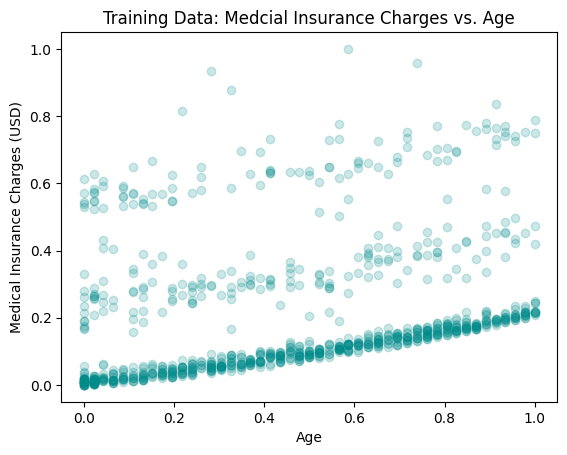

In [5]:
%matplotlib inline

# plot the 'age' variable against the target 'medical insurance charges'
plt.scatter(X_train['age'].values, y_train, color='darkcyan', alpha=.2)

# add title and labels for x- and y-axes
plt.title('Training Data: Medcial Insurance Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Medical Insurance Charges (USD)')
plt.show()

Let's consider the equation of the linear regression:

$$\hat{y} (x_i) = m*x_i + b$$

Training our model means finding the appropriate parameters for m and b. Considering the residual of the prediction $i$ as $\varepsilon_i$, we will minimize the total residual error, resorting to the cost function $J$:

$$J(m, b) = \frac{1}{2n} \sum_{i=1}^{n} \varepsilon^2_i$$

with \\( \varepsilon_i \\) being the residual error defined by:

$$ \varepsilon_i =  y_i - \hat{y}_i = y_i - (m*x_i + b)$$

Therefore, we must find $m$ and $b$ to which the cost function $J$ is minumum. For that purpose we'll resort to the following equations:

$$m = \frac{SS_{xy}}{SS_{xx}} $$
$$b = \overline{y} - m \overline{x}$$

With $SS_{xy}$ the sum of cross-deviations of y and x, and $SS_{xx}$ the sum of squared deviations of x:

$$SS_{xy} = \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y}) = \sum_{i=1}^n y_i x_i - n \overline{x} \overline{y}$$

$$SS_{xx} = \sum_{i=1}^n (x_i - \overline{x})^2 = \sum_{i=1}^n x_i^2 - n (\overline{x})^2$$

and $\overline{y}$ and $\overline{x}$ being the mean of $y$ and $x$ defined by:

$$ \overline{y} = \frac{1}{n} \sum_{i=1}^{n} y_i, \quad \overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

Below, the equations are implement as code.

_Note_: Usually it is not needed to implement linear regression from scratch as the __scikit-learn library__ already implements this for us.

In [6]:
#Ref: https://www.geeksforgeeks.org/linear-regression-python-implementation/

def estimate_coef(x: np.ndarray, y: np.ndarray) -> Tuple[float, float]:
    """
    Estimate the coefficients for simple linear regression (y = m*x + b).

    This function calculates the slope (m) and intercept (b) of the best-fitting
    line for a set of input data points using the least squares method.

    :param x: 1D numpy array representing the independent variable (input feature).
    :param y: 1D numpy array representing the dependent variable (output/target).
    :return: A tuple containing:
             - b: Intercept of the regression line.
             - m: Slope of the regression line.

    The formula for the slope (m) and intercept (b) are computed as:
    - m = Cov(x, y) / Var(x)
    - b = mean(y) - m * mean(x)
    """
    
    # number of data points
    n = np.size(x)
  
    # mean of x and y vectors
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    # SS_xy: Sum of (x - mean(x)) * (y - mean(y)) (cross-deviation)
    # SS_xx: Sum of (x - mean(x))^2 (deviation of x)
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x
  
    # calculating the slope (m) and intercept (b)
    m = SS_xy / SS_xx
    b = m_y - m * m_x
  
    return b, m

In [7]:
# estimating coefficients using the function we defined above
b, m = estimate_coef(X_train['age'].values, y_train)

# print the results
print("Estimated coefficients:\nb = {} \nm = {}".format(np.round(b, 2), np.round(m, 2)))

Estimated coefficients:
b = 0.11 
m = 0.19


### 2.3.2 Testing the Trained Lineare Regression Model

Now that we estimated the coefficients we can use them to predict new unseen data (i.e., in this case our test data). The code below shows how this is done.

output of model scaled (first 5 values): [0.22 0.19 0.3  0.23 0.12]
output of model USD (first 5 values): [14815.82 12587.42 19520.21 15063.42  8378.23]


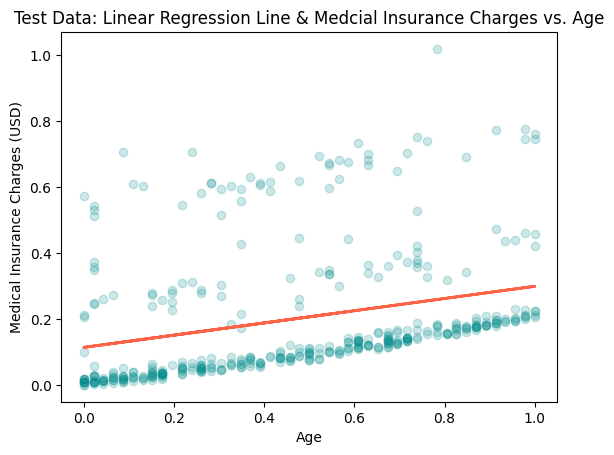

In [11]:
# predicted response vector using the simple linear regression model y = m*x + b, where x is the 'age' data
y_pred = m * X_test['age'].values + b

# in case you need to transform the predictions back to the original scale (i.e., USD)
y_pred_USD = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

print("output of model scaled (first 5 values): {}".format(np.round(y_pred[:5], 2)))
print("output of model USD (first 5 values): {}".format(np.round(y_pred_USD[:5], 2)))

# plot the actual data, target y ('medical insurance charges') vs. x ('age')
plt.scatter(X_test['age'].values, y_test, color='darkcyan', alpha=.2)

# plot the regression line 
plt.plot(X_test['age'].values, y_pred, color='tomato', lw=2)

# add title, and lables
plt.title('Test Data: Linear Regression Line & Medcial Insurance Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Medical Insurance Charges (USD)')
plt.show()

### 2.3.3 Evaluating the Model

After having trained and tested the model, the next step is to evaluate its performance. As we discussed above, we already know that __just using age__ as a variable for prediction will not really result in a good model.

All the evaluation functions defined above are implemented in the scikit-learn library:

* __R2 score__: [r2_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score)
* __MAE__: [mean_absolute_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
* __MSE__: [mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
* __RMSE__: [mean_squared_error(..., squared=False)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

Let's evaluate the results of our regression.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# calulate R2
print("R2: {}".format(r2_score(y_test, y_pred)))

# caculate MAE
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))

# calculate MSE
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))

# calculate RMSE
print("RMSE: {}".format(mean_squared_error(y_test, y_pred, squared=False)))

__What if we could resort to all features of the dataset?__


### 2.4. Exercise

__Exercise 1__: Using the Medical Insurance dataset, use all features to estimate a linear regression using Scikit-learn [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) method.

__Exercise 2__: Evaluate the results of this regression model. Does it improve? Could we accept it as model for production?

__Write your anser here__: (double click the text to edit)

## 3. Polynomial Regression

While the Linear Regression model has some relevance in the field thanks to its simplicity, most problems are not linearly separable. This problem often leads to poorly performing regressions.

__Polynomial regression__ is an extension of linear regression that allows for capturing non-linear relationships between the features and the target variable. In contrast to linear regression, which models the relationship between the input features and the target using a straight line (or a hyperplane in higher dimensions), polynomial regression models the data using curves by incorporating higher-degree terms of the input features (e.g., squares, cubes).

For example the function below describes a polynomial regression model with two input featues $x_1$ and $x_2$, where $x_1$ is described by a linear and a quadratic term, while $x_2$ is described by a linear, quadratic, and cubic term:

$$\hat{y} (x) = m_1*x_1 + m_2*x_1^2 + m_3*x_2 + m_4*x_2^2 + m_5*x_2^3 + b$$

The general formula of a polynomial of degree $d$ is:

$$y = b + \sum_{j=1}^{p} m_j x_j + \sum_{j=1}^{p} \sum_{k=1}^{p} m_{jk} x_j x_k + \cdots + \sum_{j=1}^{p} m_{jd} x_j^d$$

where $p$ inidicates the number of input features.

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png width="500">

### 3.1. Training a Polynomial Regression

Although scikit-learn does not have a dedicated __PolynomialRegression__ class, polynomial regression can be performed by combining two key classes:
* [__PolynomialFeatures__](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html): This class is used to transform the input features into polynomial features. It generates new features by raising the existing features to various powers and creating interaction terms.
* [__LinearRegression__](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Once the features have been transformed into polynomial features, the LinearRegression class can be used to fit a polynomial regression model. Since the problem remains linear with respect to the new features, we can still use the linear regression solver.

By using these two components together, you can model non-linear relationships between the features and the target variable effectively.

#### 3.1.1 Why scikit-learn Doesn't Have a Separate Polynomial Regression Model

In scikit-learn, polynomial regression is treated as a __special case__ of linear regression, which is why there is no separate PolynomialRegression model. 

Although polynomial regression allows for the modeling of non-linear relationships between the features and the target variable, it can still be solved using the same techniques as __linear regression__. The key idea is that polynomial regression __transforms__ the original features into higher-degree terms (e.g., $x^2$, $x^3$, etc.), but the problem remains linear with respect to these new features. 

In other words, even though the model includes non-linear terms like $x^2$ or $x^3$, the __coefficients__ are still linear, and the optimization problem solved by the linear regression model (minimizing squared error) remains the same.

### 3.1.2 What Does PolynomialFeatures Do?

The PolynomialFeatures class in sklearn is responsible for generating new features by raising the existing features to various powers. It does __not__ create a new type of regression model; instead, it __transforms__ our input data to include polynomial combinations of the features. For example, if you have a feature $x$ and you apply a degree-2 polynomial transformation, the resulting features would include:

$[1, x, x^2]$

This means that a linear regression model can be trained on the transformed features, allowing it to model more complex, non-linear relationships without changing the core regression method.

__Example__:
If you have a feature vector
$x = [x_1, x_2]$ 

and apply PolynomialFeatures(degree=2), the output features will include all combinations of $x_1$ and $x_2$ up to the second degree:

$[1, x_1, x_2, x_1^2, x_1 \cdot x_2, x_2^2]$


#### 3.1.3 Implementing a Polynomial Regressor
Now with all the details covered, let's implement a polynomial regressor. The code below implements a second-degree polynomial model.

_Note_: The code below shows that it is also possible to do _.fit()_ and _.transform()_ on the training data in two separate steps.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# int polynomial feature object of degree 2
poly = PolynomialFeatures(degree=2)

# fit the object to the training data
poly = poly.fit(X_train)

# transform the training and test data. The code also casts the output into a pandas.DataFrame
X_train_poly = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names_out())
X_test_poly = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out())

# print the column names of the pandas.DataFrame (this is just to show all the combinations that were calculated
# by the PolynomialFeatures object
print("The calculated polynomial features are: \n{}".format(X_train_poly.columns))

# show the first
X_train_poly.head(10)

### 3.2. Exercise

__Exercise 3__: Train a new Linear Regression with the polynomial features. Evaluate the results and compare to the previous model. What do you conclude?

__Write your anser here__: (double click the text to edit)

## 4. Logistic Regression

Dispite its name, Logistic Regression is a linear model used for __classification__. It is also known as Logit regression, and is used to estimate the probability that an instance belongs to a class. If the prediction is higher than 50%, then the output will take the positive class.

<img src=https://miro.medium.com/max/725/0*eMgJSdCcerlh__Ip.png width="600">

### 4.1. Training a Logistic Regression

This algorithm resembles its linear models class, where the coefficients of a linear function are estimated towards minimizing a cost function. However, instead of outputing prediction values, it outputs the logistic of this result.

$$\hat{y} (x_i) = \sigma{(m*x_i + b)}$$

$$\sigma(t) = \frac{1}{1 + \exp^{-t}}$$

Let's chage the objective of the Medical Insurance dataset from a regression task (predicting medical insurance cost) to a classifcation task. Instead of estimating the annual charges a person is subject to, we'll try to predic whether that person smokes or not (binary classification problem).

In [ ]:
# adding the 'charges' column back to the variables (X)
X_train["charges"] = y_train

# defining 'smoker' as the new target
y_train = X_train["smoker"]

# dropping he 'smoker' column from the variables (x)
X_train= X_train.drop("smoker", axis=1)

# performing the same steps for the test data
X_test["charges"] = y_test
y_test = X_test["smoker"]
X_test.drop("smoker", axis=1, inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

# initi logisitic regeression model
log_reg = LogisticRegression(random_state=42)

# fit the model to the training data 
log_reg = log_reg.fit(X_train, y_train)

### 4.2. Exercise

__Exercise 4__: Evaluate the Logistic Regression model. Which metrics are more relevant for the task?

__Write your anser here__: (double click the text to edit)